<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

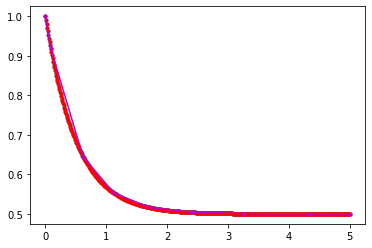

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#Уравнение в форме Коши
def difurl(t,y):
  return -2*y+1
#Нач. условие
y0=1
#Шаг
h=0.01
#Диапазон измерения
tmax=5
#Координаты по оси t
t=np.arange(0, tmax+h, h)
#Массив под решение
N=len(t)
y=np.zeros(N)
#Нач. условие в массиве
y[0]=y0
#Неявный метод Эйлера в цикле
e=0.00001
for k in range (1,N):
  z = y[k-1]
  while abs(y[k]-z)>e: 
    y[k] = z
    z=y[k-1]+h*difurl(t[k],z)
#Аналитическое решение
ya=np.exp(-2*t)+(1/2)*(1-np.exp(-2*t))
#Решение при помощи solve_ivp
sol=solve_ivp(difurl,[0,tmax],[y0],method='RK45')
t1=sol.t
y1=sol.y[0,:]
#Графики
plt.figure(1)
plt.plot(t,y,'.-c',t,ya,'.-r',t1,y1,'.-m')
plt.grid

Text(0.5, 1.0, 'График тока в катушке')

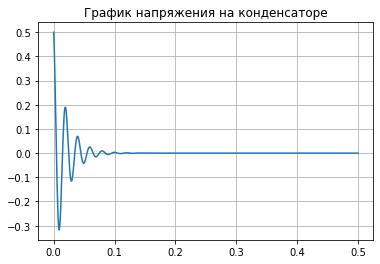

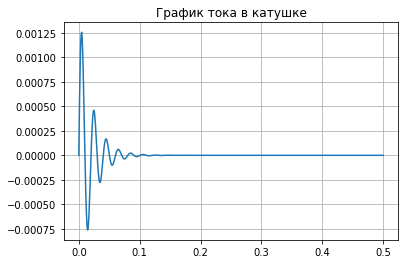

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Параметры схемы
E=100
R3=1000
L=1
C=10E-6
i=0.5

def difurl(t,y):
  global E,R,L,C
  #Обозначения
  uc=y[0]
  i=y[1]
  #Уравнения
  di=uc/L
  duc=(-i-(uc/R3))/C
  return [duc,di]
#Начальные условия
y0=[0.5,0]
#Время расчёта
tmax=0.5
#Решение с помощью solve_ivp
sol=solve_ivp(difurl, [0,tmax],y0, method='BDF')
t=sol.t
uc=sol.y[0,:]
i=sol.y[1,:]
#График
plt.figure(1)
plt.plot(t,uc)
plt.grid()
plt.title('График напряжения на конденсаторе')

plt.figure(2)
plt.plot(t,i)
plt.grid()
plt.title('График тока в катушке')